# Tests Statistiques

In [139]:
# Importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr, pearsonr, shapiro, kruskal

In [140]:
data = pd.read_csv('../output/cleaned_data/data_clean.csv', parse_dates=['date'])
data.head()

,order_id,date,product,category,price,quantity,total_sales,customer_name,customer_location,payment_method,status
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,2025-03-10,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


Avant de démarrer cette étape, quels sont les hypothèses que nous cherchons à vérifier ?
Lors de l'étape précédente, il a été question d'analyse univariée et bivariée au cours duquel nous avons réalisées des visualisations pour comprendre les relations existantes entre nos différentes variables. Et grâce à ces graphiques, nous avions émis plusieurs hypothèses :



***I.*** Nous nous étions demandé si dans certaines villes, certains produits avaient plus tendances à être commandé que d'autres. Au final, on avait remarqué que les produits de la catégorie Electronics avait plus de succès dans la plupart des villes et donc qu'il existerait bien un lien.

Il s'agit de deux variables catégorielles, l'une composée de 5 sous-catégories et l'autre de 10 sous-catégories.
Par conséquent, On utilisera le ***test Chi-2***. On commence par visualiser nos deux variables à travers un Clustermap

In [141]:
# Tableau de contingence
categorie, city = data['category'], data['customer_location']
table_contingency = pd.crosstab(categorie, city)
table_contingency

customer_location,Boston,Chicago,Dallas,Denver,Houston,Los Angeles,Miami,New York,San Francisco,Seattle
category,,,,,,,,,,
Books,5,3,1,1,2,1,4,2,4,2
Clothing,4,4,10,5,1,1,3,8,1,3
Electronics,10,12,8,13,18,10,16,11,10,10
Footwear,2,1,2,3,8,3,3,2,3,0
Home Appliances,5,2,8,4,3,2,5,3,1,7


<Figure size 2000x800 with 0 Axes>

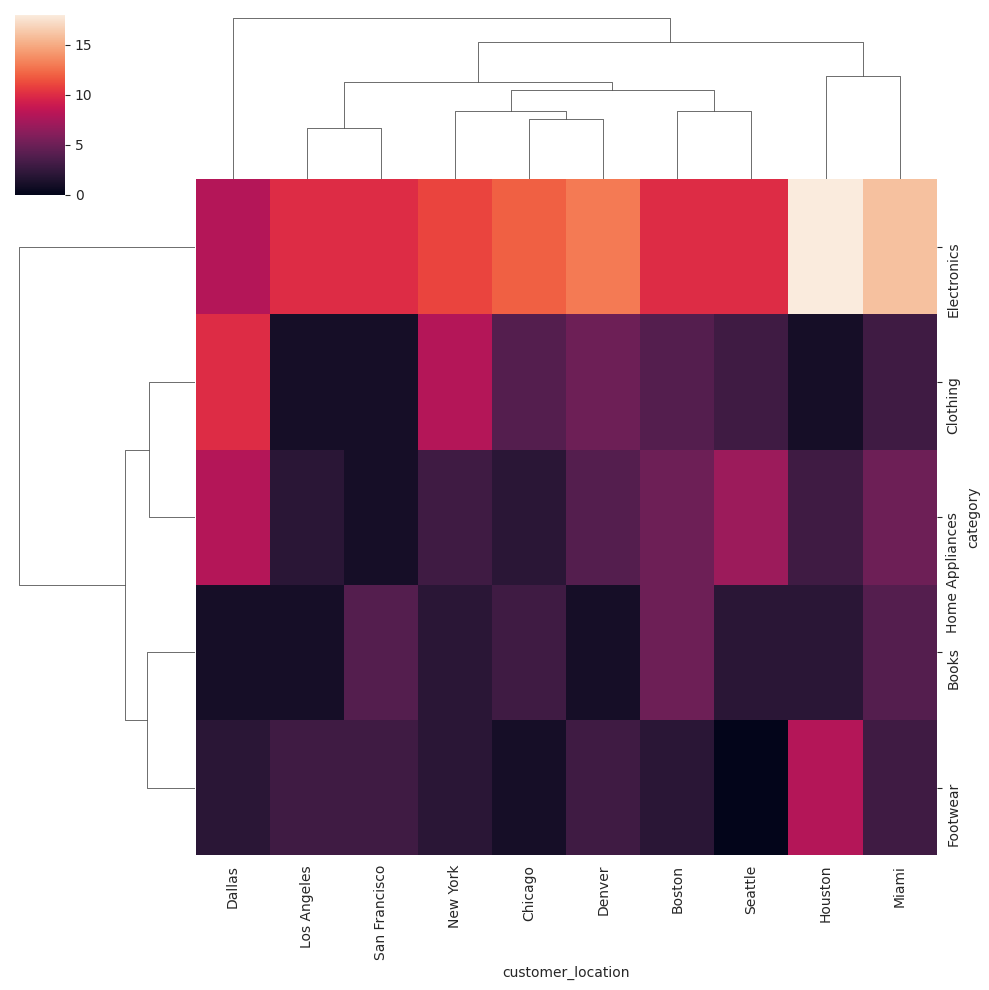

In [142]:
# Visualisation
plt.figure(figsize=(20, 8))
sns.clustermap(table_contingency)

Puis, on émet nos hypothèses :

Hypothèse nulle H0 : La ville de commande d'un produit est indépendante de la catégorie de ce produit.

Hypothèse alternative H1 : La ville de commande d'un produit dépend de la catégorie de ce produit.

In [143]:
# Test de Chi-2
chi2_stat, p_value, dof, expected = chi2_contingency(table_contingency)
print(
    'Chi-2:', chi2_stat.round(3),
    '\np_value:', p_value.round(3),
    '\nDegré de liberté:', dof,
    '\nfréquences attendues:', expected
)

Chi-2: 50.041 
p_value: 0.06 
Degré de liberté: 36 
fréquences attendues: [[ 2.6    2.2    2.9    2.6    3.2    1.7    3.1    2.6    1.9    2.2  ]
 [ 4.16   3.52   4.64   4.16   5.12   2.72   4.96   4.16   3.04   3.52 ]
 [12.272 10.384 13.688 12.272 15.104  8.024 14.632 12.272  8.968 10.384]
 [ 2.808  2.376  3.132  2.808  3.456  1.836  3.348  2.808  2.052  2.376]
 [ 4.16   3.52   4.64   4.16   5.12   2.72   4.96   4.16   3.04   3.52 ]]


Le Chi² est élevé, donc on a un écart important entre les valeurs observées et les valeurs attendues. De plus, la valeur p est supérieur à 0.05, alors on n'a pas de preuve suffisante pour rejetter l'hypothèse H0.
Nos deux variables sont ainsi indépendantes et du coup, à notre question de départ, on répondra : ***Il n’y a pas de préférence marquée pour une catégorie de produits dans une ville par rapport à une autre.***

***II.*** On s'est ensuite demandé si les commandes étaient annulées pour certaines catégories de produits en particulier. Et grâce à la visualisation réalisée, on avait constaté un fort taux d'annulation pour les catégories Book et Home Appliances. Cependant, même pour les autres catégories de produits ce taux était quand même élevé et du coup, on avait retenu que cela était plus une affaire liée à une mauvaise gestion des commandes qu'à un lien réel entre catégorie et statut. À présent, vérifions cela: Il s'agit ici de deux variables catégorielles, l'une à 5 et l'autre 3 sous-catégories. Nous utiliserons donc aussi le ***test de Chi²***.

In [144]:
# Tableau de contingence
statut = data['status']
table_contingency = pd.crosstab(categorie, statut)
table_contingency

status,Cancelled,Completed,Pending
category,,,
Books,7,6,12
Clothing,13,15,12
Electronics,33,44,41
Footwear,8,10,9
Home Appliances,16,13,11


<Figure size 2000x800 with 0 Axes>

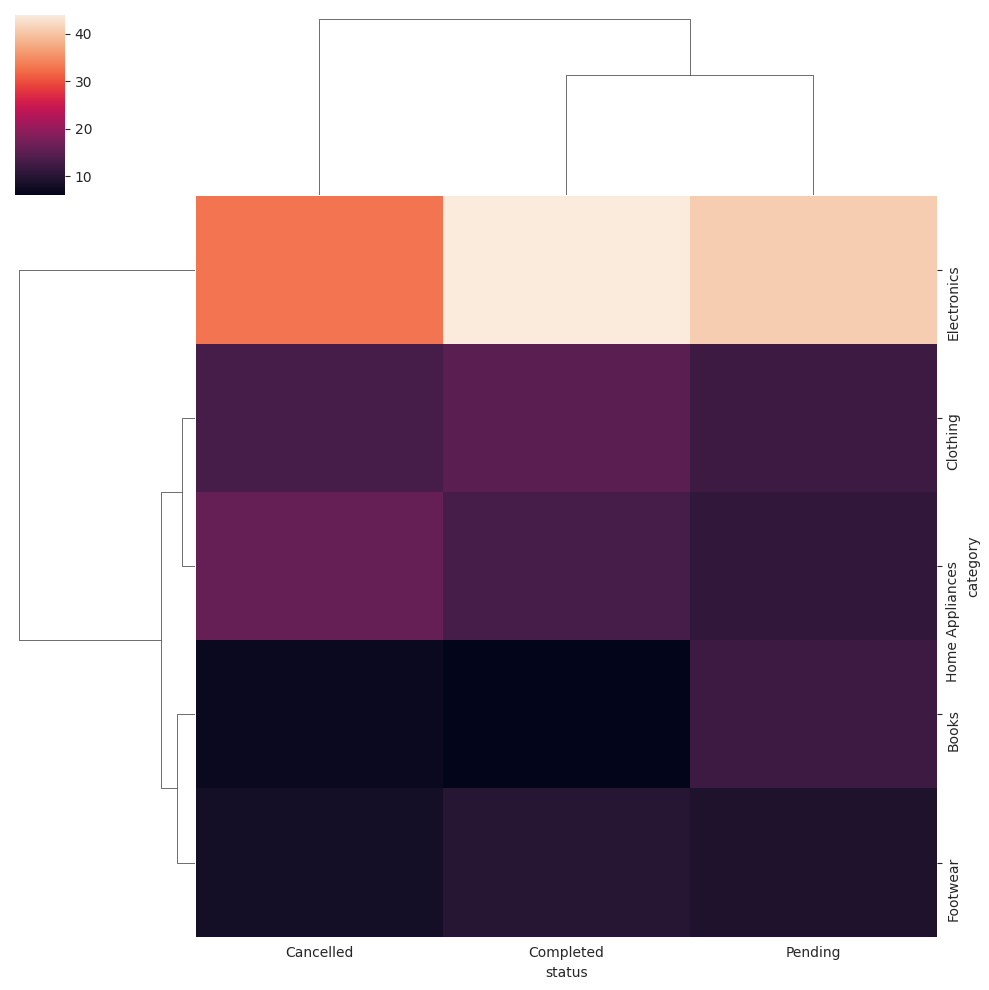

In [145]:
# Visualisation
plt.figure(figsize=(20, 8))
sns.clustermap(table_contingency)

Hypothèse nulle H0 : Le statut d'une commande est indépendante de la catégorie d'un produit.

Hypothèse alternative H1 : Le statut d'une commande dépend de la catégorie d'un produit.

In [146]:
# Test du Chi-2
chi2_stat, p_value, dof, expected = chi2_contingency(table_contingency)
print(
    'Chi-2:', chi2_stat.round(3),
    '\np_value:', p_value.round(3),
    '\nDegré de liberté:', dof,
    '\nfréquences attendues:', expected
)

Chi-2: 4.875 
p_value: 0.771 
Degré de liberté: 8 
fréquences attendues: [[ 7.7    8.8    8.5  ]
 [12.32  14.08  13.6  ]
 [36.344 41.536 40.12 ]
 [ 8.316  9.504  9.18 ]
 [12.32  14.08  13.6  ]]


La valeur p est supérieur à 0.05. Par conséquent, on n'a pas de preuve suffisante pour rejetter H0. Ansi, nos deux variables sont bien indépendantes. Notre Hypothèse initiale est donc valide, La commande d'aucune catégorie de produit n'est plus susceptible d'être annulé qu'une.

***III.*** On s'est demandé, s'il existait une relation entre le prix et la quantité d'un produit lors d'une commande. Grâce au nuage de points et au coéfficient de Pearson, on a observé aucun lien linéaire entre ses deux variables. Cependant, l'existence d'un lien (pas forcément linéaire) est possible. Donc vérifions cela avec le ***test de Spearman***

Hypothèse H0 : Il n'existe aucun lien entre nos deux variables

Hypothèse H1 : Il existe un lien entre nos deux variables

In [147]:
# Test de Spearman
r_stat, p_value = spearmanr(data['price'], data['quantity'])
print(
    'Coéfficient de Spearman:', r_stat,
    '\nValeur p:', p_value
)

Coéfficient de Spearman: 0.027335242093104745 
Valeur p: 0.6671065420706883


Le coéfficient est très faible et la p valeur est supérieur à 0.05, donc on ne peut pas rejetter l'hypothèse H0. D'où l'inexistance d'une relation entre ces deux variables.

***IV.*** On s'est ensuite demandé, s'il existait une relation entre le prix et le total des ventes d'un produit lors d'une commande. Par contre, ici grâce au nuage de points, on a observé un lien linéaire entre ses deux variables. Vérifions cela avec le ***test de Pearson***

Hypothèse H0 : Il n'existe aucun lien entre nos deux variables

Hypothèse H1 : Il existe un lien entre nos deux variables

In [148]:
# Test de Pearson
r_stat, p_value = pearsonr(data['price'], data['total_sales'])
print(
    'Coéfficient de Pearson:', r_stat,
    '\nValeur p:', p_value
)

Coéfficient de Pearson: 0.8466734881861273 
Valeur p: 6.680221108499094e-70


Le coéfficient de Pearson est très fort et la p valeur est inférieur à 0.05, donc on rejette l'hypothèse H0. Il existe alors une corrélation linaire entre ces deux variables. Notre hypothèse de départ est ainsi approuvée

***V.*** On s'est demandé, si le prix des produits influencait le statut de la commande. Du coup, on a construit des boxplots et nous avions conclu qu'il était très peu probable qu'il y existe une relation. Il s'agit d'une variable quantitative et une variable qualitatives à 3 sous-catégories.

In [149]:
# Test de normalité
norm_stat, p_value = shapiro(data['price'])
alpha = 0.05
if p_value > alpha :
    print('Les données suivent une loi normale')
else:
    print('Les données ne suivent pas une loi normale')

Les données ne suivent pas une loi normale


On ne pourra donc pas utiliser de test paramétrique. On utilisera ainsi le ***test de Kruskal-Wallis***

On commence par définir nos hypothèses :

Hypothèse nulle H0 : Les distributions des groupes sont identiques

Hypothèse alternative H1 : La distribution d'au moins un des groupes est différente.

In [150]:
# Test de Kruskal-Wallis
statut_cancelled = data.loc[data.status == "Cancelled", 'price']
statut_pending = data.loc[data.status == "Pending", 'price']
statut_completed = data.loc[data.status == "Completed", 'price']
stat, p_value = kruskal(statut_cancelled, statut_pending, statut_completed)
print(
    'statistique:', stat,
    '\nValeur p:', p_value
)

statistique: 0.4744273295417578 
Valeur p: 0.7888227263833127


La p valeur étant supérieur à 0.05, on n'a pas de preuve suffisante pour rejetter H0. Par conséquent, les distributions des groupes sont identiques et il n'y a pas de relation entre le prix et le statut de la commande. Notre hypothèse de départ est donc bien vérifiée.

***VI.*** On s'est demandé, si plus le montant total de la commande est élévée plus le client aura tendance à ne pas l'à completer. Du coup, on a également construit des boxplots et nous avions conclu qu'il semblait n'y avoir aucune relation entre ces deux variables. Il s'agit d'une variable quantitative et une variable qualitatives à 3 sous-catégories.

In [151]:
# Test de normalité
norm_stat, p_value = shapiro(data['total_sales'])
alpha = 0.05
if p_value > alpha :
    print('Les données suivent une loi normale')
else:
    print('Les données ne suivent pas une loi normale')

Les données ne suivent pas une loi normale


On ne pourra donc pas utiliser de test paramétrique. On utilisera ainsi le ***test de Kruskal-Wallis***

On commence par définir nos hypothèses :

Hypothèse nulle H0 : Les distributions des groupes sont identiques

Hypothèse alternative H1 : La distribution d'au moins un des groupes est différente.

In [152]:
# Test de Kruskal-Wallis
statut_cancelled = data.loc[data.status == "Cancelled", 'total_sales']
statut_pending = data.loc[data.status == "Pending", 'total_sales']
statut_completed = data.loc[data.status == "Completed", 'total_sales']
stat, p_value = kruskal(statut_cancelled, statut_pending, statut_completed)
print(
    'statistique:', stat,
    '\nValeur p:', p_value
)

statistique: 0.6318593485214357 
Valeur p: 0.7291107236153378


La p valeur étant supérieur à 0.05, on n'a pas de preuve suffisante pour rejetter H0. Par conséquent, les distributions des groupes sont identiques et il n'y a pas de relation entre le montant total de la commande et son statut. Notre hypothèse de départ est donc également bien vérifiée.

***VII.*** On s'est enfin demandé, si le moyen de paiement influencait le statut de la commande ?. Du coup, on a construit un Heatmap et il semblait y avoir une relation entre ces deux variables. Il s'agit de deux variables qualitatives, l'une a 3 sous-catégories et l'autre cinq. On utilisera donc le ***test du Chi²***.

In [153]:
# Tableau de contingence
payment = data['payment_method']
table_contingency = pd.crosstab(payment, statut)
table_contingency

status,Cancelled,Completed,Pending
payment_method,,,
Amazon Pay,7,21,13
Credit Card,16,17,21
Debit Card,20,14,19
Gift Card,18,6,18
PayPal,16,30,14


Hypothèse nulle H0 : Le statut d'une commande est indépendante du moyen de paiement.

Hypothèse alternative H1 : Le statut d'une commande dépend du moyen de paiement.

In [154]:
# Test du Chi-2
chi2_stat, p_value, dof, expected = chi2_contingency(table_contingency)
print(
    'Chi-2:', chi2_stat.round(3),
    '\np_value:', p_value.round(3),
    '\nDegré de liberté:', dof,
    '\nfréquences attendues:', expected
)

Chi-2: 22.464 
p_value: 0.004 
Degré de liberté: 8 
fréquences attendues: [[12.628 14.432 13.94 ]
 [16.632 19.008 18.36 ]
 [16.324 18.656 18.02 ]
 [12.936 14.784 14.28 ]
 [18.48  21.12  20.4  ]]


La valeur du Chi² indique qu'il y a un écart important entre la distribution attendu et celle obtenue. De plus, La p valeur est inférieur à 0.05, donc on rejette l'hypthèse H0 et par conséquent, Le statut de la commande dépend éffectivement du moyen de paiement. La question qu'on se pose à présent est : quels moyens de paiement sont à la source de l'annulation de la plupart des commandes ?

Pour y répondre, on se sert du graphe suivant :

<Axes: title={'center': 'Nombre de commandes annulées par mode de paiement'}, xlabel='payment_method', ylabel="Taux d'annulation de commandes">

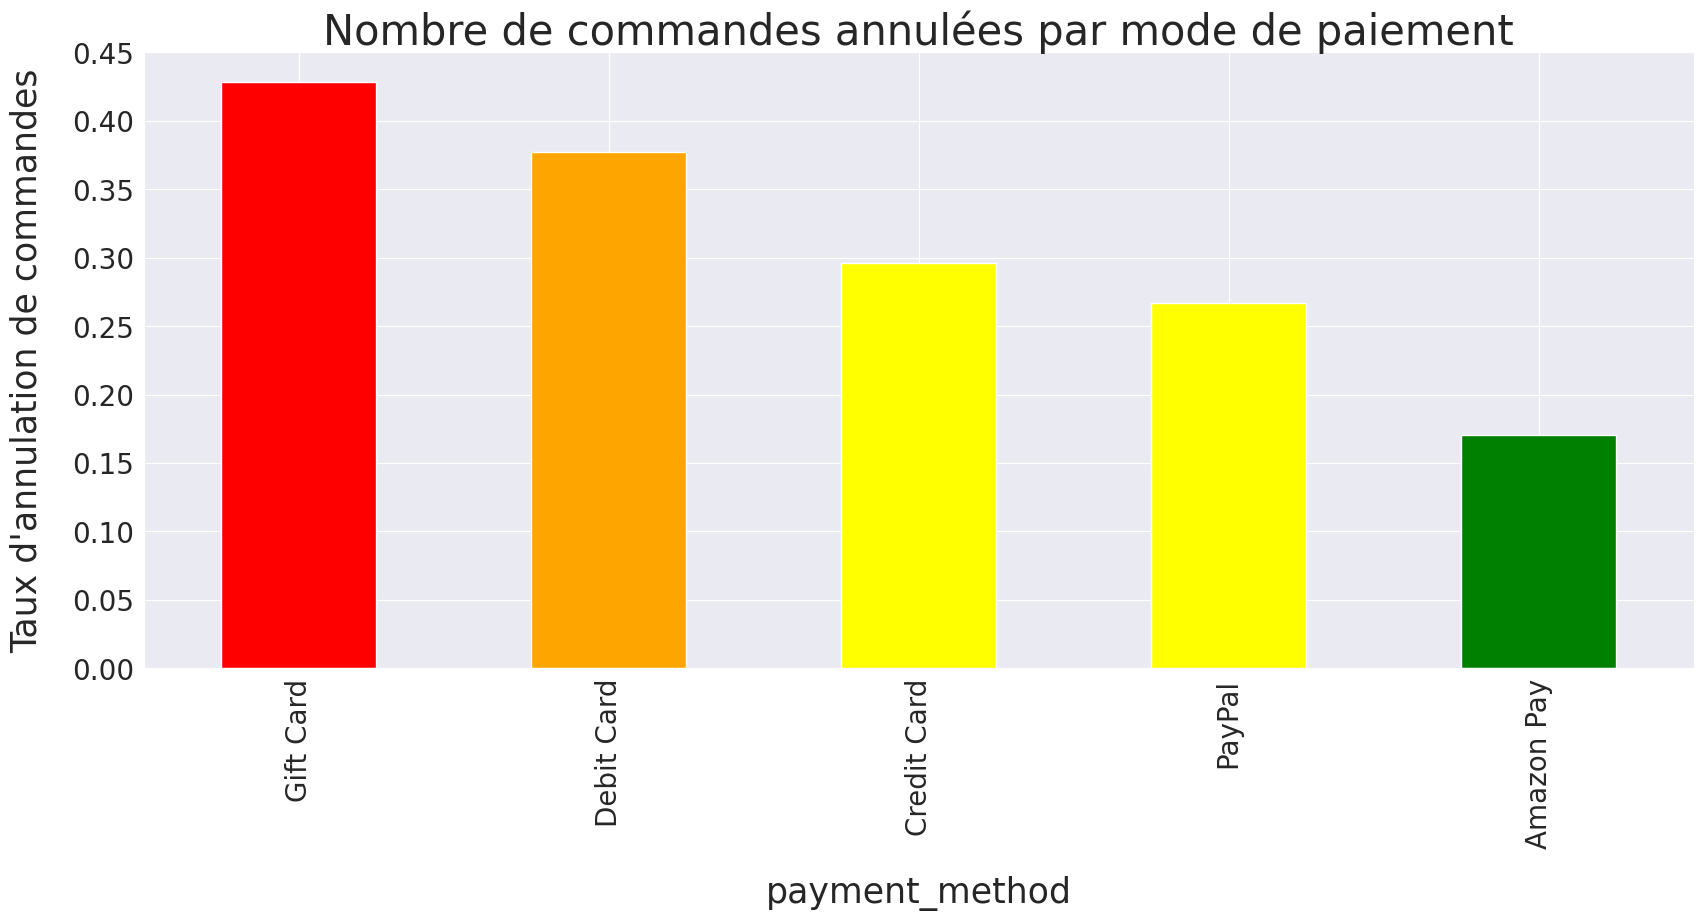

In [156]:
# Taux d'annulation par moyen de paiement
table = table_contingency['Cancelled'] / (table_contingency['Cancelled']+table_contingency['Completed']+table_contingency['Pending'])
table.sort_values(ascending=False, inplace=True)

# Visualisation
plt.figure(figsize=(20, 8))
plt.title("Nombre de commandes annulées par mode de paiement", fontsize=30)
plt.xlabel('Méthode de paiement', fontsize=25, labelpad=20); plt.ylabel('Taux d\'annulation de commandes', fontsize=25, labelpad=20)
plt.tick_params(labelsize=20)
table.plot(kind='bar', color=['red', 'orange', 'yellow', 'yellow', 'green'])

D'après le graphe ci-dessus, on observe un taux élevé d'annulation des commandes payées par carte cadeaux. Nous devrons donc privilégier les paiements par Amazon Pay et au pire par PayPal ou Carte de crédit.